## Learn to use Seaborn with pratice
### [seaborn: statistical data visualization](https://seaborn.pydata.org/)


## An introduction to seaborn

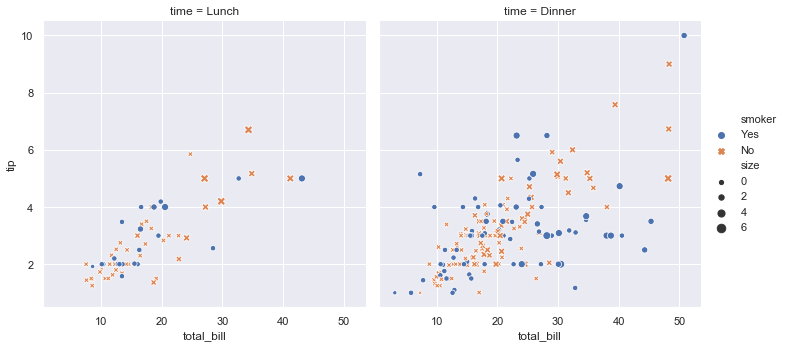

In [2]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

### function replot()
``` python
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)```

Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

Extra keyword arguments are passed to the underlying function, so you should refer to the documentation for each to see kind-specific options.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

See the tutorial for more information.

After plotting, the FacetGrid with the plot is returned and can be used directly to tweak supporting plot details or add other layers.

Note that, unlike when using the underlying plotting functions directly, data must be passed in a long-form DataFrame with variables specified by passing strings to x, y, and other parameters.

#### Parameters:	
x, y : names of variables in data

> Input data variables; must be numeric.

hue : name in data, optional

> Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

size : name in data, optional

> Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.

style : name in data, optional

> Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.

data : DataFrame

> Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

row, col : names of variables in data, optional

> Categorical variables that will determine the faceting of the grid.

col_wrap : int, optional

> “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

row_order, col_order : lists of strings, optional

> Order to organize the rows and/or columns of the grid in, otherwise the orders are inferred from the data objects.

palette : palette name, list, or dict, optional

> Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

hue_order : list, optional

> Specified order for the appearance of the hue variable levels, otherwise they are determined from the data. Not relevant when the hue variable is numeric.

hue_norm : tuple or Normalize object, optional

> Normalization in data units for colormap applied to the hue variable when it is numeric. Not relevant if it is categorical.

sizes : list, dict, or tuple, optional

> An object that determines how sizes are chosen when size is used. It can always be a list of size values or a dict mapping levels of the size variable to sizes. When size is numeric, it can also be a tuple specifying the minimum and maximum size to use such that other values are normalized within this range.

size_order : list, optional

> Specified order for appearance of the size variable levels, otherwise they are determined from the data. Not relevant when the size variable is numeric.

size_norm : tuple or Normalize object, optional

> Normalization in data units for scaling plot objects when the size variable is numeric.

legend : “brief”, “full”, or False, optional

> How to draw the legend. If “brief”, numeric hue and size variables will be represented with a sample of evenly spaced values. If “full”, every group will get an entry in the legend. If False, no legend data is added and no legend is drawn.

kind : string, optional

> Kind of plot to draw, corresponding to a seaborn relational plot. Options are {scatter and line}.

height : scalar, optional

> Height (in inches) of each facet. See also: aspect.

aspect : scalar, optional

> Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

facet_kws : dict, optional

> Dictionary of other keyword arguments to pass to FacetGrid.

kwargs : key, value pairings

> Other keyword arguments are passed through to the underlying plotting function.



#### Returns:	
g : FacetGrid

> Returns the FacetGrid object with the plot on it for further tweaking.

While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line.

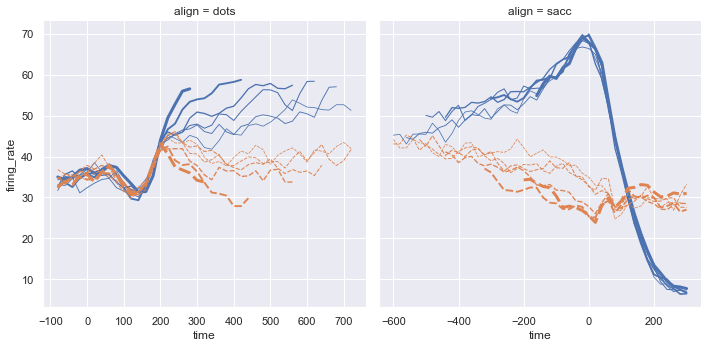

In [3]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend=False, data=dots);

### Line plots
The relplot() function has a convenient kind parameter to let you easily switch to this alternate representation:

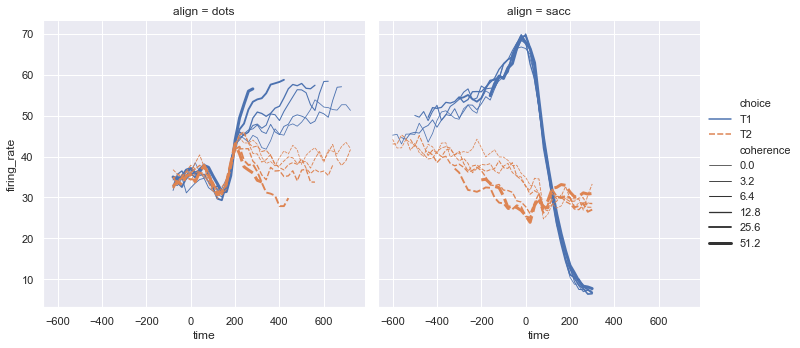

In [4]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            kind="line", legend="full", data=dots);

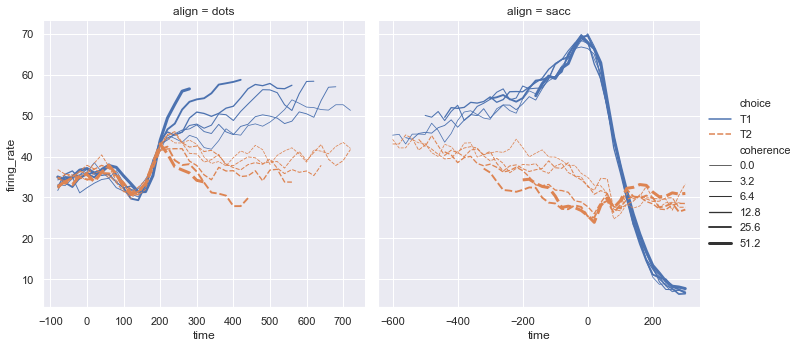

In [5]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

### Statistical estimation and error bars
Often we are interested in the average value of one variable as a function of other variables. Many seaborn functions can automatically perform the statistical estimation that is neccesary to answer these questions:

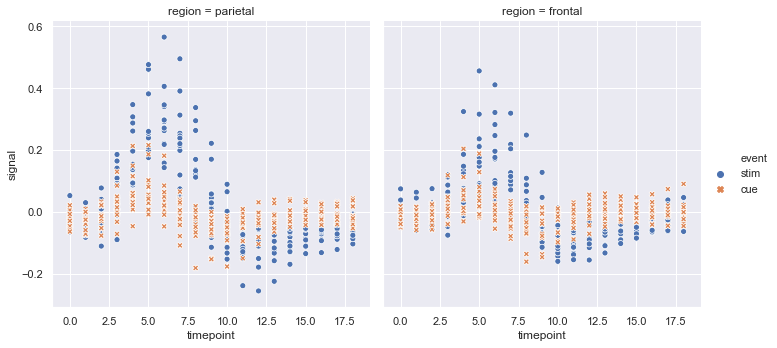

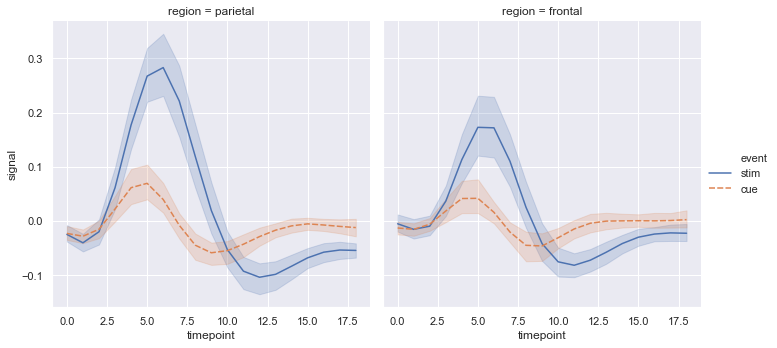

In [6]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            data=fmri);
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

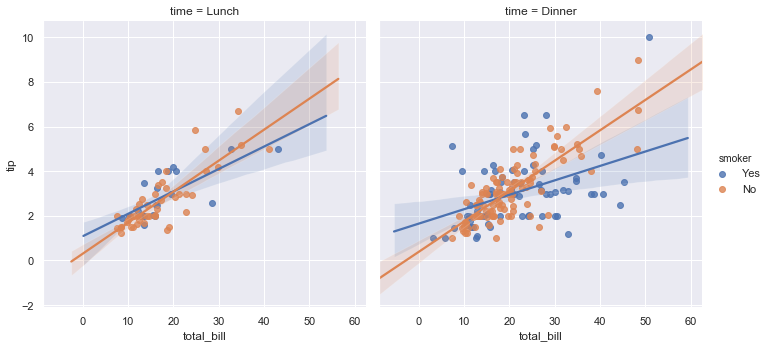

In [7]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
           data=tips);

### Specialized categorical plots
Use `catplot()` to visualize categorical variables.

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

Categorical scatterplots:
- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")

Categorical distribution plots:
- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

Categorical estimate plots:
- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

#### kind="swarm"
A scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

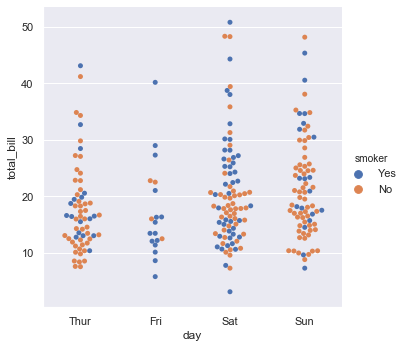

In [8]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

#### kind="violin"
Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from:

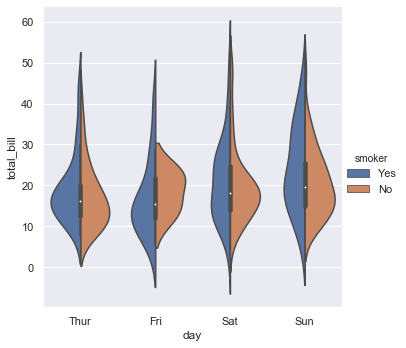

In [9]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

#### kind="bar"
show the only mean value and its confidence interval within each nested category:

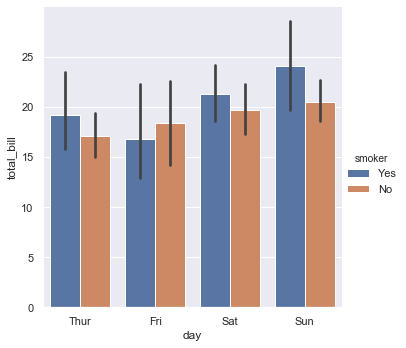

In [10]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips);

### Figure-level and axes-level functions

Each different figure-level plot kind combines a particular “axes-level” function with the FacetGrid object. For example, the scatter plots are drawn using the scatterplot() function, and the bar plots are drawn using the barplot() function. These functions are called “axes-level” because they draw onto a single matplotlib axes and don’t otherwise affect the rest of the figure.

The upshot is that the figure-level function needs to control the figure it lives in, while axes-level functions can be combined into a more complex matplotlib figure with other axes that may or may not have seaborn plots on them:

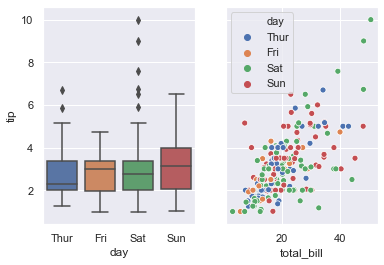

In [15]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);

Controling the size of the figure-level functions works a little bit differently than it does for other matplotlib figures. Instead of setting the overall figure size, the figure-level functions are parameterized by the size of each facet. And instead of setting the height and width of each facet, you control the height and aspect ratio (ratio of width to height). This parameterization makes it easy to control the size of the graphic without thinking about exactly how many rows and columns it will have, although it can be a source of confusion:

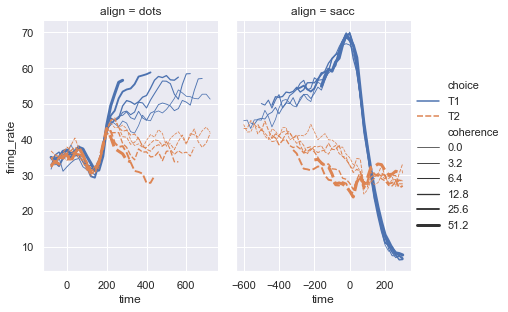

In [13]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            height=4.5, aspect=2 / 3,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

#### To tell "figure-level" from "axes-level"
- The way you can tell whether a function is "figure-level" or "axes-level" is **whether it takes an ax= parameter.** 
- You can also distinguish the two classes by their output type: **axes-level functions return the matplotlib axes**, while **figure-level functions return the FacetGrid.**

### Visualizing dataset structure
There are two other kinds of figure-level functions in seaborn that can be used to make visualizations with multiple plots. They are each oriented towards illuminating the structure of a dataset. One, jointplot(), focuses on a single relationship:
- jointplot()
- pairplot()

### Customizing plot appearance
The plotting functions try to use good default aesthetics and add informative labels so that their output is immediately useful. But defaults can only go so far, and creating a fully-polished custom plot will require additional steps. Several levels of additional customization are possible.

The first way is to use one of the alternate seaborn themes to give your plots a different look. Setting a different theme or color palette will make it take effect for all plots:

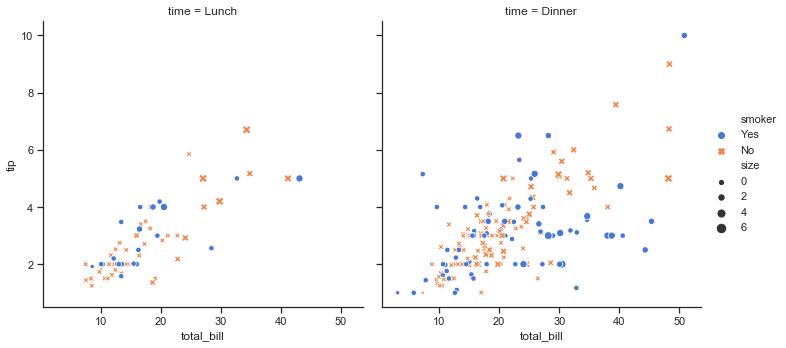

In [23]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

Finally, where there is a direct correspondence with an underlying matplotlib function (like scatterplot() and plt.scatter), additional keyword arguments will be passed through to the matplotlib layer:

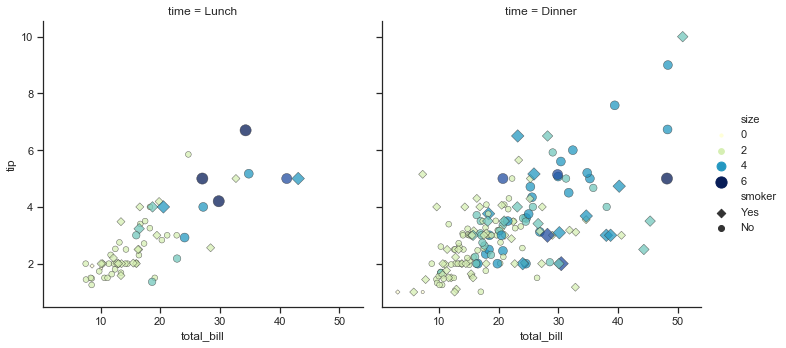

In [24]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=tips);

Some customization of figure-level functions can be accomplished through additional parameters that get passed to FacetGrid, and you can use the methods on that object to control many other properties of the figure. For even more tweaking, you can access the matplotlib objects that the plot is drawn onto, which are stored as attributes:

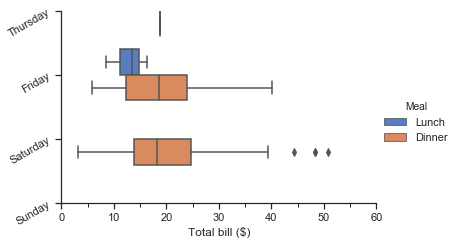

In [25]:
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);

### Next - Visualizing statistical relationships